<a href="https://colab.research.google.com/github/Navya83676/Coding-Raja/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
import pandas as pd

def create_data(path):
    label = []
    data = []
    # Get list of folders in path
    folder = os.listdir(path)
    for i in folder:
        # Create full path of the folder
        folder_path = os.path.join(path, i)
        # Create list of files in folders
        folder_list = os.listdir(folder_path)
        # Iterate through each file in the folder
        for file in folder_list:
            # Create full path to the file
            file_path = os.path.join(folder_path, file)
            label.append(i)
            data.append(file_path)
    # Convert list (label, data) to pandas dataframe
    data_path = pd.Series(data, name='filepath')
    label = pd.Series(label, name='label')
    return pd.concat([data_path, label], axis=1)

def load_data():
    base_dir = '/content/drive/MyDrive/coding raja datasets'  # Adjust the path if necessary
    training_path = os.path.join(base_dir, 'training')
    validation_path = os.path.join(base_dir, 'validation')
    evaluation_path = os.path.join(base_dir, 'evaluation')

    train_data = create_data(training_path)
    val_data = create_data(validation_path)
    eval_data = create_data(evaluation_path)

    return train_data, val_data, eval_data

train_data, val_data, eval_data = load_data()

# Display first few rows of the training data
train_data.head()

,filepath,label
0,/content/drive/MyDrive/coding raja datasets/tr...,Egg
1,/content/drive/MyDrive/coding raja datasets/tr...,Egg
2,/content/drive/MyDrive/coding raja datasets/tr...,Egg
3,/content/drive/MyDrive/coding raja datasets/tr...,Egg
4,/content/drive/MyDrive/coding raja datasets/tr...,Egg


In [16]:
print(train_data.shape)
print(val_data.shape)
print(eval_data.shape)

(9866, 2)
(3430, 2)
(3347, 2)


In [17]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [18]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

In [19]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)


test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Applying image data gernerator to train and test data

train_generator = train_datagen.flow_from_dataframe(train_data,
                                                    x_col= 'filepath',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(val_data,
                                                 x_col= 'filepath',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(eval_data,
                                                  x_col= 'filepath',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 9866 validated image filenames belonging to 11 classes.
Found 3430 validated image filenames belonging to 11 classes.
Found 3347 validated image filenames belonging to 11 classes.


In [21]:
train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/coding raja datasets/training',
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('/content/drive/MyDrive/coding raja datasets/validation',
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [22]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# Block 2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# Block 3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(11,activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,315,083 (5.02 MB)

 Trainable params: 1,313,995 (5.01 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=5,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 10,restore_best_weights=True,verbose=0)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 7,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


309/309 ━━━━━━━━━━━━━━━━━━━━ 1291s 4s/step - accuracy: 0.1551 - loss: 0.6820 - val_accuracy: 0.1472 - val_loss: 0.3654 - learning_rate: 0.0010
Epoch 2/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.3016 - loss: 0.2787 - val_accuracy: 0.1983 - val_loss: 0.7213 - learning_rate: 0.0010
Epoch 3/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.3605 - loss: 0.2553 - val_accuracy: 0.3580 - val_loss: 0.3294 - learning_rate: 0.0010
Epoch 4/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 720s 2s/step - accuracy: 0.3882 - loss: 0.2447 - val_accuracy: 0.3644 - val_loss: 0.2992 - learning_rate: 0.0010
Epoch 5/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.4253 - loss: 0.2336 - val_accuracy: 0.3673 - val_loss: 0.2880 - learning_rate: 0.0010
Epoch 6/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 664s 2s/step - accuracy: 0.4530 - loss: 0.2238 - val_accuracy: 0.4548 - val_loss: 0.2330 - learning_rate: 0.0010
Epoch 7/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.4804 - loss: 0.2169 - val_accur

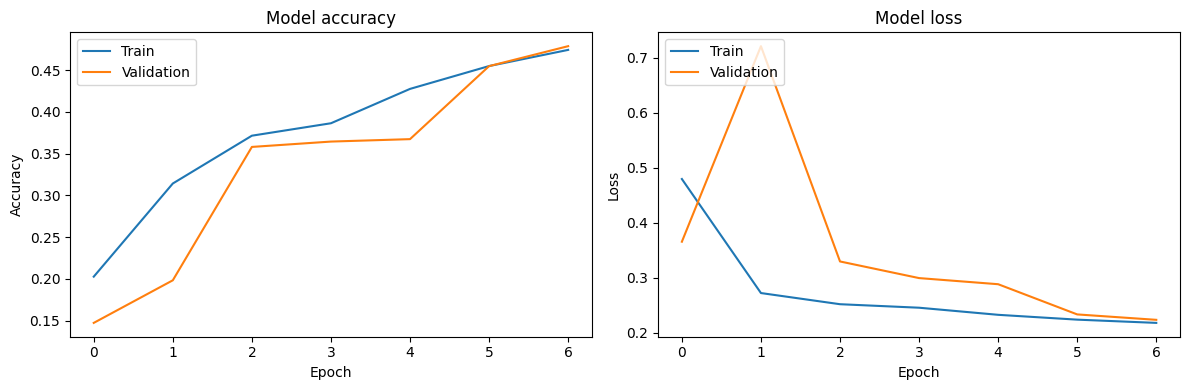

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cat_dog.history['accuracy'])
plt.plot(cat_dog.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cat_dog.history['loss'])
plt.plot(cat_dog.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [26]:
!pip uninstall graphviz
!pip install graphviz
!apt-get install graphviz

Found existing installation: graphviz 0.20.3
Uninstalling graphviz-0.20.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/graphviz-0.20.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/graphviz/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 364, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", l

In [27]:
!pip install --upgrade pydot

  Attempting uninstall: pydot
    Found existing installation: pydot 1.4.2
    Uninstalling pydot-1.4.2:
      Successfully uninstalled pydot-1.4.2


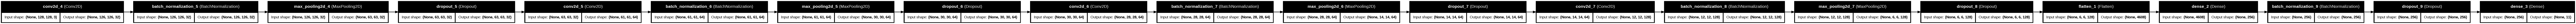

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
           rankdir='LR',  # Change the layout direction (try 'TB', 'BT', etc.)
           expand_nested=False,  # Disable expanding nested layers
           dpi=96  # Adjust the resolution
          )

In [29]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)


The accuracy of the model for training data is: 50.010138750076294
The Loss of the model for training data is: 0.20928387343883514
The accuracy of the model for validation data is: 47.87172079086304
The Loss of the model for validation data is: 0.2231905311346054


In [31]:
input_shape = (128, 128, 3)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/coding raja datasets/evaluation',
    target_size=input_shape[:2],  # Match the input shape of your model
    batch_size=32,  # Adjust as needed
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Found 3347 images belonging to 11 classes.


In [39]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


The accuracy of the model for testing data is: 48.013144731521606
The Loss of the model for testing data is: 0.21480634808540344


In [40]:

labels =['Bread','Dairy product','Dessert','Egg','Fried food','Meat','Noodles-Pasta','Rice','Seafood' ,'Soup','Vegetable-Fruit']
print(classification_report(y_true, y_pred,target_names=labels))


                 precision    recall  f1-score   support

          Bread       0.07      0.05      0.06       368
  Dairy product       0.04      0.01      0.01       148
        Dessert       0.17      0.15      0.16       500
            Egg       0.09      0.05      0.07       335
     Fried food       0.19      0.06      0.09       287
           Meat       0.13      0.25      0.17       432
  Noodles-Pasta       0.04      0.04      0.04       147
           Rice       0.03      0.05      0.04        96
        Seafood       0.06      0.03      0.04       303
           Soup       0.15      0.17      0.16       500
Vegetable-Fruit       0.09      0.18      0.12       231

       accuracy                           0.12      3347
      macro avg       0.10      0.09      0.09      3347
   weighted avg       0.11      0.12      0.11      3347



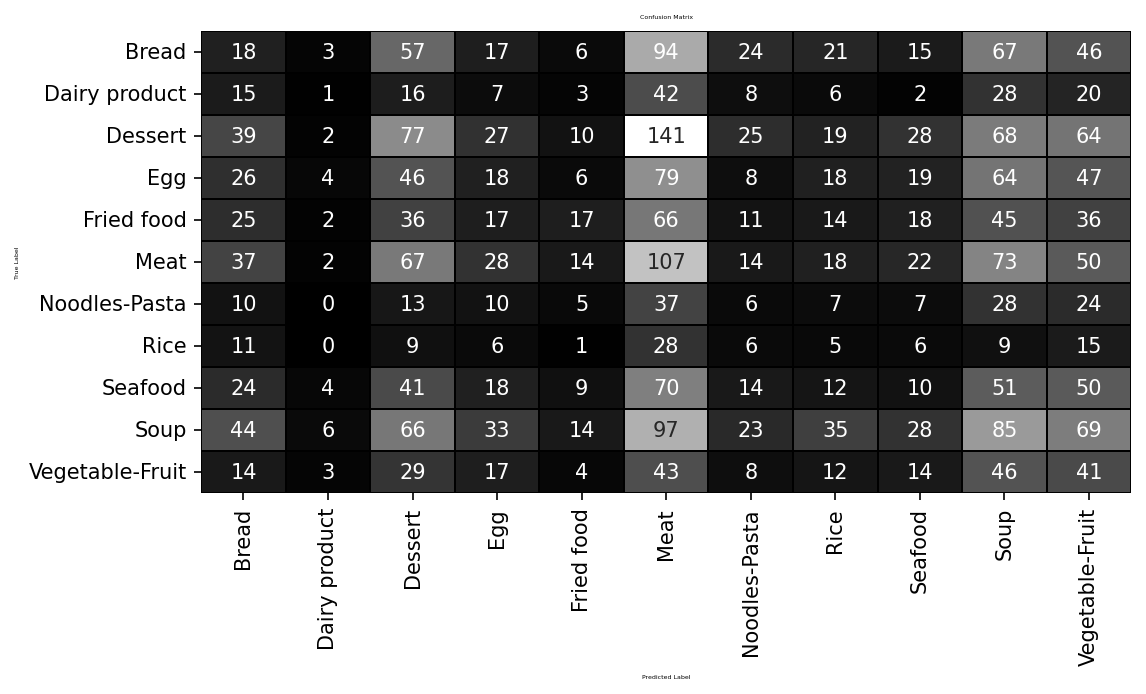

In [46]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=150)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=3)
plt.ylabel("True Label",fontsize=3)
plt.title("Confusion Matrix",fontsize=3)

plt.show()